# RF Engineering: Link Budget Analysis
This notebook demonstrates how to calculate the received power at a receiver based on the **Friis Transmission Equation**.

### The Physics
The power received by an antenna ($P_r$) at a distance ($d$) from a transmitting antenna is defined by:

$$P_r = P_t + G_t + G_r + 20\log_{10}\left(\frac{c}{4\pi d f}\right)$$

Where:
* $P_t$: Transmitted power (dBm)
* $G_t, G_r$: Antenna gains (dBi)
* $c$: Speed of light ($\approx 3 \times 10^8$ m/s)
* $f$: Carrier frequency (Hz)

In [10]:
import numpy as np

def calculate_fspl(distance_m, freq_hz):
    """Calculate Free Space Path Loss in dB"""
    c = 3e8  # Speed of light
    fspl = 20 * np.log10(distance_m) + 20 * np.log10(freq_hz) + 20 * np.log10(4 * np.pi / c)
    return fspl

# Parameters
p_tx_dbm = 20      # 100mW
g_tx_dbi = 2.15    # Simple dipole
g_rx_dbi = 5.0     # Patch antenna
dist_m = 500       # 500 meters
freq_hz = 2.4e9    # 2.4 GHz WiFi

# Logic
loss = calculate_fspl(dist_m, freq_hz)
p_rx_dbm = p_tx_dbm + g_tx_dbi + g_rx_dbi - loss

print(f"Total Path Loss: {loss:.2f} dB")
print(f"Received Power: {p_rx_dbm:.2f} dBm")

Total Path Loss: 94.03 dB
Received Power: -66.88 dBm


Now lets try out some emerge stuff. Run this simple script to get going.

**Important**: To run the Pyvista viewer in Jupyter notebooks you have to add these lines:
```python
import pyvista as pv
pv.set_jupyter_backend('trame')
```

Also, the fourth button from the right can be pressed to switch to a local rendering which allows you to rotate the display!

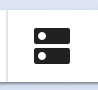

In [11]:
from emerge.core import *
import pyvista as pv
pv.set_jupyter_backend('trame')

wga = 22.86*mm
wgb = 10.16*mm
length = 50.0*mm
sim = Simulation('Waveguide')

waveguide = Box(wga, length, wgb)

sim.commit_geometry()
sim.mw.set_frequency(9e9)
sim.generate_mesh()

sim.mw.bc.RectangularWaveguide(waveguide.front, 1)
sim.mw.bc.RectangularWaveguide(waveguide.back, 2)

data = sim.mw.run_sweep()

field = data.field[0]

sim.display.add_object(waveguide)
sim.display.add_field(field.grid(2*mm).vector('E'))
sim.display.show()


0:10:59.626299  INFO   : Setting frequency as 9000000000.0Hz.
0:10:59.627080  INFO   : Starting mesh generation phase.
0:10:59.627372  INFO   : Adding PEC boundary condition with tags [1, 2, 3, 4, 5, 6].
0:10:59.633692  INFO   : GMSH Meshing complete!
0:10:59.647579  INFO   : Selected face [3].
0:10:59.649276  INFO   : Selected face [4].
0:10:59.653970  INFO   : Pre-assembling matrices of 1 frequency points.
0:10:59.654373  INFO   : Precomputing group 0.
0:10:59.665821  INFO   : Starting single threaded solve of 1 jobs.
0:10:59.666951  INFO   : [p00/t00-j001] Calling SuperLU Solver.
0:10:59.671750  INFO   : [p00/t00-j001] Elapsed time taken: 0.005 seconds
0:10:59.672720  INFO   : [p00/t00-j001] Calling SuperLU Solver.
0:10:59.673054  INFO   : [p00/t00-j001] Elapsed time taken: 0.000 seconds
0:10:59.673399  INFO   : Solving complete
0:10:59.673789  INFO   : Computing S-parameters
0:10:59.674784  INFO   : Post Processing simulation frequency = 9.000 GHz
0:10:59.677538  WARNING: S-paramet

Widget(value='<iframe src="http://localhost:64642/index.html?ui=P_0x132d3e8c0_5&reconnect=auto" class="pyvista…